In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

3.1 Building and Testing Helper Function:
1. Implementing Sigmoid Function:

  1. Task To Do:
  
     Implement the Logistic Function by completing the code or writing your own function.

In [7]:
def logistic_function(x):
    """
    Computes the logistic function applied to any value of x.

    Arguments:

    x: scalar or numpy array of any size.

    Returns:

    y: logistic function applied to x.

    """
    x_arr = np.asarray(x)
    y = 1.0 / (1.0 + np.exp(-x_arr))
    # return scalar for scalar input, numpy array otherwise
    if np.isscalar(x):
        return float(y)
    return y

Test for logistic_function

In [8]:
def test_logistic_function():
    """
    Test cases for the logistic_function.
    """
    # Test with scalar input
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3)  # 0.5
    assert round(logistic_function(x_scalar), 3) == expected_output_scalar, "Test failed for scalar input"

    # Test with positive scalar input
    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3)  # ~0.881
    assert round(logistic_function(x_pos), 3) == expected_output_pos, "Test failed for positive scalar input"

    # Test with negative scalar input
    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3)  # ~0.047
    assert round(logistic_function(x_neg), 3) == expected_output_neg, "Test failed for negative scalar input"

    # Test with numpy array input
    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047])
    assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for numpy array input"

    print("All tests passed for logistic_function!")

# Run test
test_logistic_function()

All tests passed for logistic_function!


2. Implementing Log Loss Function

In [9]:
# 2. Implementing Log Loss Function

import numpy as np

def log_loss(y_true, y_pred):
    """
    Computes log loss for true target value y ={0 or 1} and predicted target value y' inbetween {0-1}.

    Arguments:

    y_true (scalar): true target value {0 or 1}.

    y_pred (scalar): predicted taget value {0-1}.

    Returns:

    loss (float): loss/error value

    """
    # Convert to numpy arrays to handle scalar or array inputs uniformly
    y_true_arr = np.asarray(y_true)
    y_pred_arr = np.asarray(y_pred)

    # If any predicted probability is exactly 0 or 1, raise ValueError
    if np.any(y_pred_arr <= 0.0) or np.any(y_pred_arr >= 1.0):
        raise ValueError("y_pred contains 0 or 1 which would cause log(0). Expected probabilities in (0,1).")

    # element-wise binary cross-entropy
    loss = - (y_true_arr * np.log(y_pred_arr) + (1 - y_true_arr) * np.log(1 - y_pred_arr))

    return loss if loss.shape != () else float(loss)


# Quick verification prints
print("Demo log_loss examples:")
print("log_loss(0, 0.1) =>", log_loss(0, 0.1))
print("log_loss(1, 0.9) =>", log_loss(1, 0.9))


# Test cases for log_loss (as in worksheet)
def test_log_loss():
    import numpy as np
    # Test 1: perfect prediction y_true=1, y_pred=1 -> should raise ValueError
    try:
        log_loss(1, 1)
        raise AssertionError("Expected ValueError for y_pred=1")
    except ValueError:
        pass

    # Test 2: perfect prediction y_true=0, y_pred=0 -> should raise ValueError
    try:
        log_loss(0, 0)
        raise AssertionError("Expected ValueError for y_pred=0")
    except ValueError:
        pass

    # Test 3: partially correct predictions
    y_true = 1
    y_pred = 0.8
    expected_loss = -(1 * np.log(0.8)) - (0 * np.log(1 - 0.8))
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for (1,0.8)"

    y_true = 0
    y_pred = 0.2
    expected_loss = -(0 * np.log(0.2)) - (1 * np.log(1 - 0.2))
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for (0,0.2)"

    print("All tests passed for log_loss!")

# Run test
test_log_loss()


Demo log_loss examples:
log_loss(0, 0.1) => 0.10536051565782628
log_loss(1, 0.9) => 0.10536051565782628
All tests passed for log_loss!


3. Implementing Cost Function

In [10]:
# 3. Implementing Cost Function

import numpy as np

def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)

    Args:

    y_true (array_like, shape (n,)): array of true values (0 or 1)

    y_pred (array_like, shape (n,)): array of predicted values (probability of y_pred being 1)

    Returns:

    cost (float): nonnegative cost corresponding to y_true and y_pred

    """
    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"

    n = len(y_true)
    loss_vec = log_loss(np.asarray(y_true), np.asarray(y_pred))  # uses log_loss which may raise ValueError if preds are 0/1
    cost = np.mean(loss_vec)
    return float(cost)


# Test for cost_function (as in worksheet)
def test_cost_function():
    import numpy as np
    y_true = np.array([1, 0, 1])
    y_pred = np.array([0.9, 0.1, 0.8])
    expected_cost = (-(1 * np.log(0.9)) - (0 * np.log(1 - 0.9)) +
                     -(0 * np.log(0.1)) - (1 * np.log(1 - 0.1)) +
                     -(1 * np.log(0.8)) - (0 * np.log(1 - 0.8))) / 3.0
    result = cost_function(y_true, y_pred)
    assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"
    print("Test passed for cost_function!")

# Run test
test_cost_function()

Test passed for cost_function!


4. Cost function for logistic regression parameters (vectorized)

In [11]:
# 4. Cost function for logistic regression parameters (vectorized)

import numpy as np

def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters.

    Args:

    X (ndarray, shape (m,n)): data on features, m observations with n features.

    y (array_like, shape (m,)): array of true values of target (0 or 1).

    w (array_like, shape (n,)): weight parameters of the model.

    b (float): bias parameter of the model.

    Returns:

    cost (float): nonnegative cost corresponding to y and y_pred.

    """
    n, d = X.shape
    assert len(y) == n, "Number of feature observations and number of target observations do not match."
    assert len(w) == d, "Number of features and number of weight parameters do not match."

    # Matrix-vector multiplication and adding bias
    z = X.dot(w) + b

    # Compute predictions using logistic function (sigmoid)
    y_pred = logistic_function(z)

    # Compute the cost using the cost function
    cost = cost_function(y, y_pred)
    return float(cost)


# Test print (as in worksheet example)
X_test = np.array([[10, 20], [-10, 10]])
y_test = np.array([1, 0])
w_test = np.array([0.5, 1.5])
b_test = 1
print(f"cost for logistic regression(X = {X_test.tolist()}, y = {y_test.tolist()}, w = {w_test.tolist()}, b = {b_test}) = {costfunction_logreg(X_test, y_test, w_test, b_test)}")


cost for logistic regression(X = [[10, 20], [-10, 10]], y = [1, 0], w = [0.5, 1.5], b = 1) = 5.500008350784906


5.1 Compute Gradient

In [12]:
import numpy as np

def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters.

    Args:

    X (ndarray, shape (n,d)): Input data, n observations with d features

    y (array_like, shape (n,)): True labels (0 or 1)

    w (array_like, shape (d,)): Weight parameters of the model

    b (float): Bias parameter of the model

    Returns:

    grad_w (array_like, shape (d,)): Gradients of the cost function with respect to the weight
    parameters

    grad_b (float): Gradient of the cost function with respect to the bias parameter

    """
    n, d = X.shape  # X has shape (n, d)
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Compute z and predictions using logistic function (sigmoid)
    z = X.dot(w) + b
    y_pred = logistic_function(z)

    # Compute gradients
    error = (y - y_pred)                       # shape (n,)
    grad_w = - (1.0 / n) * X.T.dot(error)     # shape (d,)
    grad_b = - (1.0 / n) * np.sum(error)      # scalar

    return grad_w, float(grad_b)


# Simple assertion test for compute_gradient (as in worksheet)
X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1
grad_w, grad_b = compute_gradient(X, y, w, b)
print("Gradients computed successfully.")
print(f"grad_w: {grad_w}")
print(f"grad_b: {grad_b}")


Gradients computed successfully.
grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


5.2 Implementing Gradient Descent for Training Sigmoid Regression:

In [13]:
import numpy as np

def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Implements batch gradient descent to optimize logistic regression parameters.

    Args:

    X (ndarray, shape (n,d)): Data on features, n observations with d features

    y (array_like, shape (n,)): True values of target (0 or 1)

    w (array_like, shape (d,)): Initial weight parameters

    b (float): Initial bias parameter

    alpha (float): Learning rate

    n_iter (int): Number of iterations

    show_cost (bool): If True, displays cost every 100 iterations

    show_params (bool): If True, displays parameters every 100 iterations

    Returns:

    w (array_like, shape (d,)): Optimized weight parameters

    b (float): Optimized bias parameter

    cost_history (list): List of cost values over iterations

    params_history (list): List of parameters (w, b) over iterations

    """
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_w, grad_b = compute_gradient(X, y, w, b)

        # Update weights and bias
        w -= alpha * grad_w
        b -= alpha * grad_b

        # Compute cost
        cost = costfunction_logreg(X, y, w, b)

        # Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history


# Test the gradient_descent function (as in worksheet)
X = np.array([[0.1, 0.2], [-0.1, 0.1]])
y = np.array([1, 0])
w_init = np.zeros(X.shape[1])
b_init = 0.0
alpha = 0.1
n_iter = 100

w_out, b_out, cost_history, params_history = gradient_descent(X, y, w_init, b_init, alpha, n_iter, show_cost=False, show_params=False)

print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")

# Simple assertion checks (as in worksheet)
def test_gradient_descent():
    assert len(cost_history) == n_iter, "Cost history length does not match the number of iterations"
    assert w_out.shape == w_init.shape, "Shape of output weights does not match the initial weights"
    assert isinstance(b_out, float), "Bias output is not a float"
    assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"
    print("All tests passed for gradient_descent!")

test_gradient_descent()


Final parameters:
w: [0.49236201 0.24271295], b: -0.023120387837231953
Final cost: 0.662954
All tests passed for gradient_descent!


6. Decision / Prediction Function

In [14]:
import numpy as np

def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.

    Arguments:

    X (ndarray, shape (n,d)): Array of test independent variables (features) with n samples and d features.

    w (ndarray, shape (d,)): Array of weights learned via gradient descent.

    b (float): Bias learned via gradient descent.

    threshold (float, optional): Classification threshold for predicting class labels. Default is 0.5.

    Returns:

    y_pred (ndarray, shape (n,)): Array of predicted dependent variable (binary class labels: 0 or 1).

    """
    # Compute the predicted probabilities using the logistic function
    y_test_prob = logistic_function(np.asarray(X).dot(w) + b)

    # Classify based on the threshold
    y_pred = (y_test_prob >= threshold).astype(int)
    return y_pred


# Test for prediction (as in worksheet)
def test_prediction():
    X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]])
    w_test = np.array([1.0, -1.0])
    b_test = 0.0
    threshold = 0.5
    expected_output = np.array([0, 1, 1])
    y_pred = prediction(X_test, w_test, b_test, threshold)
    assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"
    print("Test passed for prediction!")

test_prediction()

Test passed for prediction!


7. Evaluating Classifier

In [15]:
import numpy as np

def evaluate_classification(y_true, y_pred):
    """
    Computes the confusion matrix, precision, recall, and F1-score for binary classification.

    Arguments:

    y_true (ndarray, shape (n,)): Ground truth binary labels (0 or 1).

    y_pred (ndarray, shape (n,)): Predicted binary labels (0 or 1).

    Returns:

    metrics (dict): A dictionary containing confusion matrix, precision, recall, and F1-score.

    """
    y_true = np.asarray(y_true).astype(int)
    y_pred = np.asarray(y_pred).astype(int)

    TP = int(np.sum((y_true == 1) & (y_pred == 1)))  # True Positives
    TN = int(np.sum((y_true == 0) & (y_pred == 0)))  # True Negatives
    FP = int(np.sum((y_true == 0) & (y_pred == 1)))  # False Positives
    FN = int(np.sum((y_true == 1) & (y_pred == 0)))  # False Negatives

    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])

    # Precision, recall, and F1-score
    precision = TP / (TP + FP) if (TP + FP) > 0.0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0.0 else 0.0
    if precision + recall == 0:
        f1_score = 0.0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)

    metrics = {
        "confusion_matrix": confusion_matrix,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score,
        "TP": TP, "TN": TN, "FP": FP, "FN": FN
    }
    return metrics


# Quick test for evaluate_classification
y_true = np.array([1, 0, 1, 0, 1])
y_pred = np.array([1, 0, 0, 0, 1])
metrics = evaluate_classification(y_true, y_pred)
print("Confusion matrix:\n", metrics["confusion_matrix"])
print(f"Precision: {metrics['precision']}, Recall: {metrics['recall']}, F1: {metrics['f1_score']}")


Confusion matrix:
 [[2 0]
 [1 2]]
Precision: 1.0, Recall: 0.6666666666666666, F1: 0.8


3.2 Putting Helper Function to Action - Sigmoid Regression for the dataset:

1. Some Basic Data Operation, Loading, Analysis and Cleaning:

In [17]:
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]

df = pd.read_csv(url, names=columns)

# Display first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


3.2.2 Handling Missing or Invalid Values

In [18]:
# Columns where zero is an invalid value
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)

# Fill NaN values with column median
df.fillna(df.median(), inplace=True)

# Verify no missing values remain
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


3.2.3 Splitting Features and Target Variable

In [19]:
X = df.drop(columns=['Outcome']).values
y = df['Outcome'].values

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (768, 8)
Shape of y: (768,)


3.2.4 Train–Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (614, 8)
Test set size: (154, 8)


3.2.5 Feature Scaling

In [26]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


3.2.6 Initializing Model Parameters

In [22]:
n_features = X_train_scaled.shape[1]

w_init = np.zeros(n_features)
b_init = 0.0

alpha = 0.1
n_iter = 1000

3.2.7 Training Sigmoid Regression Model

In [23]:
w_opt, b_opt, cost_history, params_history = gradient_descent(
    X_train_scaled,
    y_train,
    w_init,
    b_init,
    alpha,
    n_iter,
    show_cost=True,
    show_params=False
)


Iteration 0: Cost = 0.676575
Iteration 100: Cost = 0.465441
Iteration 200: Cost = 0.455913
Iteration 300: Cost = 0.453874
Iteration 400: Cost = 0.453316
Iteration 500: Cost = 0.453148
Iteration 600: Cost = 0.453096
Iteration 700: Cost = 0.453079
Iteration 800: Cost = 0.453074
Iteration 900: Cost = 0.453072
Iteration 999: Cost = 0.453071


3.2.8 Visualizing Cost Reduction

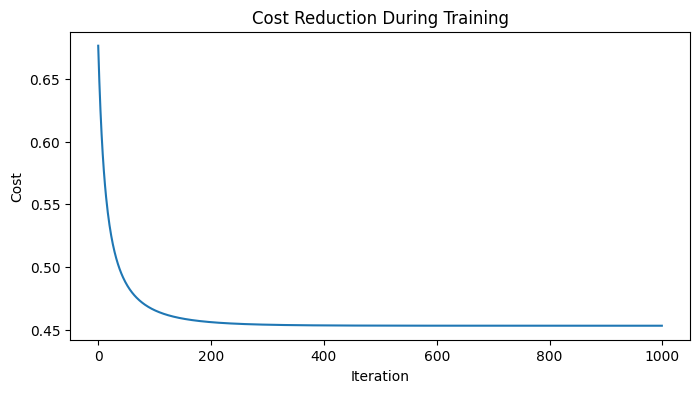

In [25]:
plt.figure(figsize=(8, 4))
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Reduction During Training")
plt.show()

3.2.9 Making Predictions on Test Data

In [28]:
y_test_pred = prediction(X_test_scaled, w_opt, b_opt)

3.2.10 Evaluating Model Performance

In [29]:
metrics = evaluate_classification(y_test, y_test_pred)

print("Confusion Matrix:")
print(metrics["confusion_matrix"])

print("\nPrecision:", metrics["precision"])
print("Recall:", metrics["recall"])
print("F1 Score:", metrics["f1_score"])

accuracy = (y_test_pred == y_test).mean()
print("\nAccuracy:", accuracy)


Confusion Matrix:
[[82 18]
 [27 27]]

Precision: 0.6
Recall: 0.5
F1 Score: 0.5454545454545454

Accuracy: 0.7077922077922078


3.2.11 Inspecting Learned Parameters

In [31]:
print("Bias (b):", b_opt)

print("\nWeights:")
for feature_name, weight in zip(columns[:-1], w_opt):
    print(f"{feature_name}: {weight:.4f}")

Bias (b): -0.876699116663487

Weights:
Pregnancies: 0.3850
Glucose: 1.2054
BloodPressure: -0.0499
SkinThickness: 0.0227
Insulin: -0.0753
BMI: 0.7039
DiabetesPedigreeFunction: 0.2365
Age: 0.1467
